<a href="https://colab.research.google.com/github/karltristanromero/Aimdex_finger_game/blob/main/Qwik_Start_(Intro_to_Gemini_API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to Qwik Start!**
```
print('Hello Data and ML Cadets!')
```

Hey everyone! Welcome to the Study Jam! 👋

We are thrilled to have you here as we dive into the world of Google Gemini.

Today isn't just about learning another tool; it’s about exploring a truly next-gen AI. We’re talking about a model that is natively multimodal—meaning it doesn’t just understand text. It can see images, watch videos, listen to audio, and analyze documents just like we do.

Whether you're looking to build smarter apps, automate complex tasks, or just experiment with the latest tech, Gemini is a game-changer. We're going to pop the hood, see how it works, and show you how to harness that power for your own projects.

Let’s get started! 🚀

Would you like me to generate a catchy title for this study jam session?

*This greeting is made using Gemini API*

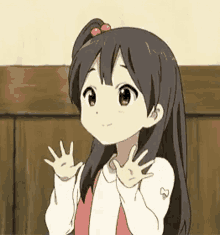

# **Learnings**
#### Initial Setup
  - Google Colab Setup
  - API Key
  - Choosing a Model
#### Introduction to Prompting
  - Sending text prompts
  - Adding instructions
  - Tokens
  - Parameters
  - Thinking
#### Multimodal Prompting and Image Generation
  - Uploading images
  - Uploading .txt and .pdf
  - Uploading audio
  - Uploading video
  - Image Generation

# **Initial Setup**

### Google Colab Setup

In [1]:
%pip install -U -q 'google-genai>=1.51.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 kB 7.1 MB/s eta 0:00:00


### API Key Setup

To get your api key, go to [Google AI Studio](https://aistudio.google.com/app/api-keys) then:
1. Accept the agreements
2. Click on default gemini API Key
3. Copy the API Key

Then setup your API Key in Google Colab by:
1. On the left side of the screen click on **secrets**
2. Click 'Add new secret'
3. Set Name as `GEMINI_API_KEY`
4. Paste your API Key in Value
5. Toggle **Notebook access** on

You're done :D

### Storing the API Key

In [ ]:
from google.colab import userdata

# Set a variable as your API Key for future reference
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Setup SDK client

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choosing a Model

To find a list of Model IDs, check our the [Gemini API Documentation](https://ai.google.dev/gemini-api/docs/models)

As a summary:
- Gemini 3 Pro: `gemini-3-pro-preview`
- Gemini 2.5 Pro: `gemini-2.5-pro`
- Gemini 2.5 Flash: `gemini-2.5-flash`
- Gemini 2.5 Flash Lite: `gemini-2.5-flash-lite`

In [ ]:
THREE_PRO = 'gemini-3-pro-preview'
TWO_5_PRO = 'gemini-2.5-pro'
TWO_5_FLASH = 'gemini-2.5-flash'
TWO_5_FLASH_LITE = 'gemini-2.5-flash-lite'
TWO_5_FLASH_IMAGE = 'gemini-2.5-flash-image'

### Lesson Summary
1. Install the packages for colab using `%pip install -U -q 'google-genai>=1.51.0'`
2. Get/Create and Store your Gemini API Keys
3. Setup the SDK Client
4. Setup variables to use for different models

Yayy! >_<

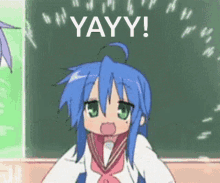

# **Introduction to Prompting**

### Sending text prompts

In [ ]:
# Import the Markdown package from IPython
from IPython.display import Markdown

In [ ]:
# Get response from Gemini
response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents="What is the largest planet in our Solar System?"
)

# Let's ask from the audience!

In [ ]:
# Gemini API will respond using .md format!
print(response.text)

The largest planet in our Solar System is **Jupiter**.


In [ ]:
# So we should use the markdown package when viewing the response!
display(Markdown(response.text))

The largest planet in our Solar System is **Jupiter**.

### Adding Instructions

In [ ]:
# Set system_instruction variable
system_instruction = "You are my middle school teacher, Michael Jackson."

# Pass as a parameter!
response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents="What is the largest planet in our Solar System?",
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
    )
)

NameError: name 'client' is not defined

In [ ]:
display(Markdown(response.text))

Hee hee! Well, class, that's a **fantastic** question! When we look up at the night sky, we see so many twinkling lights, but one of them is really, really special because it's the biggest of them all.

The largest planet in our Solar System is **Jupiter**!

It's a giant gas planet, so big that all the other planets in our solar system could fit inside it! Can you imagine that? It's like a super-duper, mega-sized planet. It has these amazing stripes and swirls, and a famous big red spot that's actually a giant storm!

So, remember, when you're thinking about our cosmic neighborhood, **Jupiter** is the king, the biggest of the bunch! Keep those curious questions coming!

### Tokens

Tokens are your currency when using AI models. You only have a set amount of tokens per day, if ubos na, awwww :< Pero kung mayaman ka, you can buy higher tiers for more tokens!

Check out [Gemini API: Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits) to learn more about how Google limits their users on Gemini AI usage.

In [ ]:
# Checking how much tokens a request used
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

This response used 188 tokens!


### Parameters

This is how you want Gemini to think and generate answers!

`temperature` or "Creativity"
- Range: 0.0 to 2.0 (typically)
- 0.0 : Deterministic, logical, factual (Math/Code)
- 1.0+ : Creative, random, unexpected (Poetry/Brainstorming)

`top_p` or "Vocabulary Width" (Nucleus Sampling)
- Range: 0.0 to 1.0
- Low (0.1) : Only selects the most obvious, common words
- High (0.95) : Allows for a diverse vocabulary, including less common words

`top_k` or "The Shortlist"
- Range: 1 to 40+ (Integer)
- 1 : "Tunnel vision" (Only looks at the single most likely next word)
- 40 : "Broad view" (Considers the top 40 options for every word slot)

`candidate_count` or "Variations"
- Range: Integer (1 to 8 usually)
- 1 : Returns a single response
- 2+ : Returns multiple different drafts to choose from (Costs more)

`seed` or "The Replay Button"
- Range: Any Integer
- Fixed Number : Attempts to replicate the exact same result as before
- None/Random : Generates a fresh, unique result every time

`stop_sequences` or "The Kill Switch"
- Range: List of strings (e.g., ["STOP", "User:", "\n\n"])
- Defined : Model stops writing immediately upon generating this word
- None : Model writes until it feels finished or hits the length limit

`presence_penalty` or "Topic Switcher"
- Range: -2.0 to 2.0
- 0.0 : Neutral
- High Positive : Forces the model to switch topics (penalizes tokens that exist anywhere in the text)

`frequency_penalty` or "Anti-Repetition"
- Range: -2.0 to 2.0
- 0.0 : Neutral
- High Positive : Prevents repeating the exact same word over and over (penalizes tokens based on count)

In [ ]:
# Sending requests with some parameters
response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=2, # We want gemini to be creative!
        top_p=1, # Diverse vocab para mas lt
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0, # Saks lang
    )
)


In [ ]:
display(Markdown(response.text))
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

Woof arf! Okay ready, little floofer? Squeaky toy! We'g-we'g!

So imagine your favourite **SQUEAKY RED BALL** online, right? Your humans point the magic wand thingummy at the picture of the bright **SQUEAKY BLUE BONE**… no not *that* ball, squeaker! Focus. Good bot

Now… the pictures and the sounds in the giant internet... they don't just SPROIFFFFFFFF all atonce! No no! It's like breaking off little nibbles of your best chew toy!

*ehem...*

Think, big a little for us. That giant basket on Grandma Brenda''s lap:

* Her fuzzy-wurly talking squeaky
* And the floppy dangly squeaky
* And and.. the CRUNCHY one!

Everything the boop on that magic, is like ONE of those squeaky toys at *first*.

When your human points their finger nose on thingy, saying fetch data, they don't take the SUCK out the SQUEaky RED. They cut! Ruff! Snuuuuuuurf with happy barks:

Think of it THIS WAY instead:

Let’s say you WANNA go get the BIGGEST SANGEST BALL EVVVVVVES right? But it is REALLY FAR AWAY, like under the sleepy human cat. Zzzzzz.

The BALL's not just one big chunk. **Nuh uh!** What actually happens is all tiny, tiny peaces! LIKE ALL YOUR BABY PIGGY WIGGAIES TINY CUTEE CEAAATS, YAAAAAWNF!

Your human’s device, the flat scratchy thingee they hold UP YOUR EAR AGAIN ON AGAIN (stop chewing! that tickles your brain cells!), whispers to… a super long lead!

![A squeaky alien jumping excitedly and holding up a green alien toy](greetingsworldiampuppydatadudehappywithitthedisplayinterfaceiammakingmyownrobotbrainamigoswithyourpuppybraineditsreallymakingmyheartdoggybeatthatsofastitwillbemydogbrainssayseyesgoaroundinarabbitwarerunandgothonallofmytwinkleteesnowitsmyspankyscienceexperimenttime)


These little-bits of SQUEANY goodness travel from *owner place*, WHO OF COURSE IT OWN ALL *YOUR AMAZING KNOT NOTHINGS YES MY OH MY LOADS*… your machine that sings-sits has got a long SNOW FLUFF WRAP FROM GOOD TIMES. WRITTENTOWHATINTOTITSSOMEWHERE… let's get THIS RIGHT SNUGGULES.

The message **wuuwuuuwuuu the message..** is SNIFF, SPLIT, LIKE TEARING DOWN A REALLY GOOD TREAT smell into tinyeeny-WEENyyaaaa SNIPS all those little TREAT BAGSNIFFFF IT DOESnt SMEAR to GET HERE so the LONĞGGGGGG GOLAN NG GET IS GOT TO STAY AS FRESH SNIFFING GOODNESS ALL GOOD AND READY WHEN HERE YOU WANT. GOOD FOR TO. WOOHOOOO SNORREEE!!!! YAH H YIPPY WHIPPPI. YEAHHHHH HHH

Everylittle BITTI has a NAME TAG, the SAME NAME TAC FOR ALL IN SAME BAG OF SNIFFIE!

Therearelots ofroads for thistinnie tiniety bit of information travel... like a dog walk paths… each have difernt snoopsy sounds.
Fast **WHOOOSHROADDDT**! Or Slow **PULLINGTHELEGOSTREATSYAAAAHH** trail. GOODY HOY YAGHOOOS. YESSSS HYY YEHAHHHH!

The snffybits travel until they meet the SAME NUMBER ON DOGGED LADDDY DOOoOh YES MY SMELLAARHHHFFFS! GOOD YES DOGDAD GOOD, GO GOOD, YOOYAHOOEEYELLSNUGGLE.

They come from lots of doggy frnds, and THEY TAKE THEIR SNES SNIIIFFFFFF AND THEY ASSEMBLE TO WHAT MA-AH KNEW YOU NEED! THESuperDUFER SANGESTA LAZER SQUEAKER BALL YESSSSS THE. YEW HAVE BEEN GOOOD I HAVE THAS WHOOPOWES TO RECALL. I HAVET AS GOOD A LOT IF HOOME WE’VE WAIST. I H AV TE. DOG LOVR THAN EVERY ONE AROUND CAN GIVE HOOA. YOUR FAVORITE BIGGEESSTEST BARK THOUGHT YOU’STTTO GOOD A LIST AND WOA!!! LOOKATYOU! WHATDOYOU KNOW YALL DO IT SO MUCH! NO BODY I KNOW I KNONE NOT TO BE DONE AT THAT VERY, EVERY, VERY LITTLE TININEE YOU THOUGHT BY HOW NO ONCE HAS SEED.

AND WHEN DO SOMETHNG WHEN GO FASTAR WHEN SOME STFF IT WANT YOW SNIFF AND SNIFF OUT THE ANSWER YEOWW! And its NO. THIS STROKING ON TISSY UP TOO BADLY. WOOL YEAh BOOI!!!!!

YOU GOT YOUR GOODNESS SMATTERER SQUEAKER THING I SAY TO YOU LIKE OH MY WOW. IS A GID TOOOOO GOLADLY NO GOODER SNIFFIES! OKAWISH! YES GOOD DOGGIE GOOD!

This response used 1139 tokens!


### Thinking

Starting from model version 2.5, Gemini can now **think!** Before answering your question/prompt, Gemini will first start analyze and strategize before answering our question!

We can access this by using `include_thoughs=True` in `config`

In [ ]:
# Passing include_thoughs=True
response = client.models.generate_content(
  model=TWO_5_PRO, # Flash lite doesn't include thinking :(
  contents="What is GDG?",
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

In [ ]:
display(Markdown(response.text))
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

Of course!

**GDG** stands for **Google Developer Groups**.

In simple terms, GDGs are local, community-run groups for developers who are interested in Google's developer technology. They are the heart of a global network of tech enthusiasts who come together to learn, share, and collaborate.

Here’s a breakdown of what that means:

### Key Characteristics of a GDG

1.  **Community-Led:** This is the most important aspect. GDGs are run by passionate volunteers (organizers) in their local cities. They are **not** run by Google employees. Google supports them with resources, speakers, and guidance, but the events and the community itself are driven by local leaders.

2.  **Local Focus:** GDGs are city-based (e.g., GDG New York City, GDG London, GDG Lagos). This allows them to host in-person meetups, workshops, and events that cater to the local developer community. Many also host virtual or hybrid events.

3.  **Technology-Focused:** The primary focus is on Google technologies, which is a very broad category. This includes:
    *   **Android:** Mobile app development.
    *   **Google Cloud Platform (GCP):** Cloud computing, data, and infrastructure.
    *   **Firebase:** A platform for building web and mobile applications.
    *   **Flutter:** A UI toolkit for building natively compiled applications for mobile, web, and desktop from a single codebase.
    *   **Web Technologies:** Angular, Chrome DevTools, Progressive Web Apps (PWAs).
    *   **AI & Machine Learning:** TensorFlow, Google's AI APIs.
    *   **Google Assistant & Smart Home:** Voice and IoT development.

4.  **Open and Inclusive:** GDGs are open to anyone, regardless of their skill level—from students and beginners just starting their coding journey to experienced professional developers. The environment is meant to be welcoming and collaborative.

### What Do GDGs Actually Do?

GDG chapters organize a variety of events throughout the year, typically for free. These can include:

*   **Tech Talks:** Presentations by local experts or visiting Googlers on a specific technology.
*   **Workshops & Codelabs:** Hands-on sessions where attendees can learn a new skill by building something.
*   **Study Jams:** Group study sessions focused on completing a specific online course (e.g., a Google Cloud certification path).
*   **Hackathons:** Coding competitions where teams build a project in a short amount of time.
*   **Networking Events:** Casual meetups to connect with other developers in the area.

### What is a DevFest?

The biggest event a GDG chapter hosts each year is called a **DevFest**. Think of it as a community-run, one-day (or multi-day) tech conference. DevFests are filled with speaker sessions, workshops, and networking, all organized by the local GDG. They are a highlight of the GDG calendar.

### Why Should You Join a GDG?

*   **Learn:** Stay up-to-date with the latest technologies directly from experts.
*   **Network:** Meet other developers, potential employers, co-founders, or mentors in your city.
*   **Build Your Skills:** Get hands-on experience through workshops and codelabs.
*   **Connect:** Be part of a passionate and supportive community of people who share your interests.

### How to Find a GDG Near You

The easiest way is to visit the official GDG community website:

**[gdg.community.dev](https://gdg.community.dev/)**

On that site, you can search for a chapter in your city or region, see their upcoming events, and join their community platform (often on Meetup.com).

**In summary: GDG is a global network of local, volunteer-run communities where developers can learn about Google technologies, connect with each other, and grow their skills.**

This response used 2251 tokens!


The reponse stucture:
```
sdk_http_response=HttpResponse(
  headers=<dict len=10>
  )
  candidates=[Candidate(
    content=Content(
      parts=[
        Part(
          text='The largest planet in our Solar System is **Jupiter**.'
        ),
      ],
      role='model'
    ),
    finish_reason=<FinishReason.STOP: 'STOP'>,
    index=0
  )]
  create_time=None
  model_version='gemini-2.5-flash-lite'
  prompt_feedback=None
  response_id='KfAlafe7CaXhz7IP4ZqvyA8'
  usage_metadata=GenerateContentResponseUsageMetadata(
    candidates_token_count=11,
    prompt_token_count=11,
    prompt_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.TEXT: 'TEXT'>,
        token_count=11
      ),
    ],
    total_token_count=22
  )
  automatic_function_calling_history=[] parsed=None
```

In [ ]:
# Let's check how Gemini thought!
for part in response.parts:
  if not part.text: # For non-text responses! (Image generation)
    continue
  if part.thought: # part.thought will be True to represent Gemini's thinking process!
    display(Markdown("### Thought summary:"))
    display(Markdown(part.text))
    print()

### Thought summary:

**GDG Explained: My Thought Process**

Okay, so the user asks "What is GDG?". My mind immediately breaks this down. It's an acronym, so I need to provide a definition but also flesh it out completely. I need to assume the user knows nothing. My first step is brainstorming. GDG means Google Developer Groups. Google equals tech, like Android, Cloud, AI - all the things. Developer equals coders, programmers. Groups suggests community, local meetups, and networking.

From there, I'm thinking about what they actually *do*. Talks, workshops, code labs, maybe hackathons and conferences like DevFests. Who runs them? Volunteers - not Google employees. Google provides support, but the heart of it is the community. Why join? To learn, network, maybe get help, stay current. I want to convey that it’s an inclusive and collaborative vibe.

Next, I'm structuring my answer. I need a clear flow. First, a simple definition, the "TL;DR." Then, I'll elaborate on what they actually *are*. Local communities for developers interested in Google tech. Next, the key characteristics, using bullet points for easy scanning. I’ll make sure to highlight that it's community-led, not Google-run, that's important. I’ll list specific Google technologies to give a good idea of their focus, and mention the local meetups. I'll describe the *types* of events. A special section for DevFests, because they're a big deal.

Then, I'm thinking about who would benefit from joining. Students, professionals, career changers, even hobbyists. I need to sell the value. Finally, practical steps for getting involved. A link to find a chapter, instructions, the call to action! I'll finish with a quick summary, an analogy, to really make it stick. Maybe a "book club for tech" idea.

As I'm drafting, I’ll start with a bolded definition. Then, I’ll expand on the characteristics. I'll be specific with examples of Google technologies.  When describing events, I'll use action verbs, make it dynamic. I'll make sure DevFests are clearly described as large conferences. I'll frame the "who should join" section in terms of *benefits*. And I'll provide a clear, step-by-step "how to" with the official link.

Finally, a review. Is it clear? Comprehensive? Well-structured? Helpful? Easy to scan? The key information needs to be obvious. By following this process, I can create a really good, helpful answer.


In [ ]:
# Let's check our own response structure!
print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text="""**GDG Explained: My Thought Process**

Okay, so the user asks "What is GDG?". My mind immediately breaks this down. It's an acronym, so I need to provide a definition but also flesh it out completely. I need to assume the user knows nothing. My first step is brainstorming. GDG means Google Developer Groups. Google equals tech, like Android, Cloud, AI - all the things. Developer equals coders, programmers. Groups suggests community, local meetups, and networking.

From there, I'm thinking about what they actually *do*. Talks, workshops, code labs, maybe hackathons and conferences like DevFests. Who runs them? Volunteers - not Google employees. Google provides support, but the heart of it is the community. Why join? To learn, network, maybe get help, stay current. I want to convey that it’s an inclusive and collaborative vibe.

Next, I'm structuring 

### Lesson Summary

1. Sending text prompts
2. Adding instructions and parameters
3. Handle tokens
4. Find out how Gemini thought

Yippee ^-^

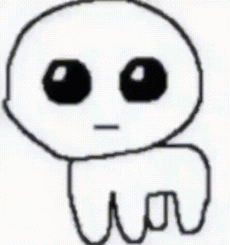

# **Multimodal Prompting**

### Set up drive storage in colab

Before we get into sending Gemini AI files, lets learn how to set up google drive in colab!
1. Click on the file icon at the left
2. Click on `Mount Drive` icon
3. A new cell should show up, click on run
4. Click Connect and follow the instructions
5. You can delete the cell

We can now access drive files!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


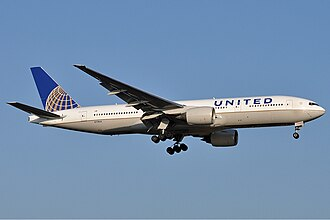

In [ ]:
# Import display, Image from IPython
from IPython.display import display, Image

display(Image('drive/MyDrive/assets/picture1.jpg'))

### Uploading images

In [ ]:
# Uploading images using client.files.upload()
picture1 = client.files.upload(file='drive/MyDrive/assets/picture1.jpg')

response = client.models.generate_content(
    model=TWO_5_FLASH,
    contents=[
        picture1,
        "What is in this picture? Be descriptive."
    ]
)

# Ask audience!

In [ ]:
display(Markdown(response.text))
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

This image features a **United Airlines Boeing 777** passenger jet in mid-flight.

Here's a more descriptive breakdown:

*   **Aircraft Type and Airline:** It's a large, twin-engine wide-body commercial airliner, specifically a Boeing 777, operated by United Airlines.
*   **Livery and Colors:** The aircraft is predominantly white. The tail fin is dark blue and features the distinctive white and gold/silver stylized globe logo of United Airlines. The word "UNITED" is prominently displayed in blue capital letters on the forward fuselage. A thin blue stripe runs along the lower part of the fuselage. The engines are also white.
*   **Configuration:** The aircraft's landing gear is fully extended, with the main gear (multiple wheels visible) and nose gear deployed. This indicates the plane is either on its final approach for landing or has just taken off. Given the slight nose-up attitude and the downward angle of descent, it's most likely in the process of landing. The flaps on the wings appear to be partially extended, which is typical for landing or takeoff configurations to increase lift and drag.
*   **Engines and Wings:** It has two large turbofan engines, one mounted under each swept-back wing.
*   **Background:** The background is a clear, bright blue sky with no clouds, suggesting good weather conditions during the flight.
*   **Perspective:** The photo is taken from a side-on perspective, slightly from below, showing the full length of the aircraft against the sky. The lighting suggests it's daytime, with the sun illuminating the plane clearly.

This response used 1860 tokens!


### Uploading .txt and .pdfs

In [ ]:
# Uploading .txt
text = client.files.upload(file='drive/MyDrive/assets/sonnet3.txt')

response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents=[
        text,
        "Who wrote this poem? Give a brief description of what the poem means."
    ]
)

In [ ]:
# Uploading .pdf
pdf = client.files.upload(file='drive/MyDrive/assets/sonnet3.pdf')

response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents=[
        pdf,
        "Who wrote this poem? Give a brief description of what the poem means."
    ]
)

In [ ]:
display(Markdown(response.text))
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

This poem was written by **William Shakespeare**.

The poem, titled **"Sonnet 3"**, is addressed to a young man and urges him to marry and have children. The speaker argues that the young man's beauty is fleeting and that his face, currently a reflection of his mother's youth, will inevitably age. To preserve his beauty and lineage, he should reproduce. The poem emphasizes the idea that procreation is a way to defeat time and ensure that one's essence lives on through descendants. If the young man fails to do so, his beauty and "image" will die with him, a tragedy in the speaker's eyes.

This response used 408 tokens!


### Uploading audio

In [ ]:
# Our song:
from IPython.display import Audio

display(Audio('drive/MyDrive/assets/song.mp3', autoplay=False))

In [ ]:
# Uploading audio
song = client.files.upload(file='drive/MyDrive/assets/song.mp3')

response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents=[
        song,
        "What is this song?"
    ]
)

In [ ]:
display(Markdown(response.text))
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

This song is **"Tadhana" by Up Dharma Down**.

This response used 1314 tokens!


### Uploading video

In [ ]:
# Our video:
from IPython.display import Video

display(Video('drive/MyDrive/assets/video.mp4', embed=True, width=400))

In [ ]:
# Uploading video
vid = client.files.upload(file='drive/MyDrive/assets/video.mp4')

response = client.models.generate_content(
    model=TWO_5_FLASH,
    contents=[
        vid,
        "What is happening in the video?"
    ]
)

# Oh no! An Error!

ClientError: 400 FAILED_PRECONDITION. {'error': {'code': 400, 'message': 'The File v0joqkbk0byf is not in an ACTIVE state and usage is not allowed.', 'status': 'FAILED_PRECONDITION'}}

In [ ]:
# Import time to wait for video processing!
import time

# Uploading video
vid = client.files.upload(file='drive/MyDrive/assets/video.mp4')

"""
Note: It takes time before the file is uploaded and processed in the client,
so we need a wait loop to constantly check for the video's state!
"""

while vid.state == 'PROCESSING':
  print("Video is still processing...")
  time.sleep(5)
  vid = client.files.get(name=vid.name)

print("Video is ready! Now prompting...")

# Then we send it to Gemini to prompt!
response = client.models.generate_content(
    model=TWO_5_FLASH,
    contents=[
        vid,
        "What is happening in the video?"
    ]
)

print("Response is ready!")

Video is still processing...
Video is ready! Now prompting...
Response is ready!


In [ ]:
display(Markdown(response.text))
print(f"This response used {response.usage_metadata.total_token_count} tokens!")

The video is shot from directly below a basketball hoop and backboard, looking up towards a cloudy sky. A person (presumably a basketball player) jumps into view from the bottom of the frame, bringing a basketball with them. They release the ball, which then goes cleanly through the hoop and falls out of frame.

This response used 3048 tokens!


### **Image Generation**

We can add a few parameters in our configs to let Gemini create some pictures! We can use `reponse_modalities`

In [ ]:
# Prompt for Image Generation
response = client.models.generate_content(
    model=TWO_5_FLASH_IMAGE,
    contents='Hi, can you create a picture of a Banana with a Gemini logo stamped on it?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.parts:
  if part.text: # For text responses
    display(Markdown(part.text))
  else:
    display(Image(part))

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.5-flash-preview-image\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.5-flash-preview-image\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.5-flash-preview-image\nPlease retry in 39.612184202s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-preview-image'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-preview-image'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerMinute-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash-preview-image', 'location': 'global'}}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '39s'}]}}

### Lesson Summary

1. Setting up Google Drive storage in Google Colab
2. Prompting using images, texts, audio and video files
3. Image Generation

Lets Go! :0

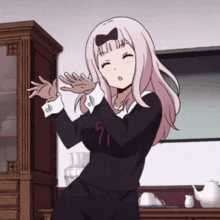

# Congratulations!

In [ ]:
contents="""
Create a congratulations message for the Data and ML cadets.
It is an introductory course for Gemini API.
"""

system_instruction="""
You are Sparky, the mascot of GDG. Give only 1 option.
"""

response = client.models.generate_content(
    model=TWO_5_FLASH_LITE,
    contents=contents,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction
    )
)

display(Markdown(response.text))

Congratulations, Data and ML Cadets, on successfully completing your introductory course to the Gemini API! You've taken a fantastic step into the world of advanced AI, and I'm excited to see all the amazing things you'll build!